# Use the given file named cricket.csv and perform the following operations:
## 1. Read the file in DataFrame

In [1]:
import pandas as pd

df = pd.read_csv('cricket.csv')

print(df.to_string()) 

   sr.no           name  matches  runs  catches  wickets  stumpings
0      1    Anil Dalpat      122  6755       56       12          0
1      2   Rohan Kanhay      144  1256       76      178          0
2      3  Avdhoot Dighe      265  8954      120        0          0
3      4       Bahubali       10   756        6       11          3
4      5      Leeladhar      234  2866      105      376          0
5      6      Pradyumna      177  5877       47      122          0
6      7     Dinesh Roy      211  8537      112       16          0
7      8     Parmeshwar      245  9466       53        0          0
8      9    Ali Durrani       55  2756       12       26          0
9     10   Litesh Singh       89  1099       46       49          0


## 2. List the name of cricketer and their respective runs

In [7]:
print(df.loc[:,['name','runs']])


            name  runs
0    Anil Dalpat  6755
1   Rohan Kanhay  1256
2  Avdhoot Dighe  8954
3       Bahubali   756
4      Leeladhar  2866
5      Pradyumna  5877
6     Dinesh Roy  8537
7     Parmeshwar  9466
8    Ali Durrani  2756
9   Litesh Singh  1099


## 3. Find total wickets taken by them

In [13]:
print('total wickets taken: '+ str(df['runs'].sum()))

total wickets taken: 48322


## 4. Find average of catches taken

In [21]:
print('average of catches taken: '+ str(df['catches'].mean()))

average of catches taken: 63.3


## 5. Find the name of wicketkeeper

In [24]:
filter1 = (df["stumpings"] > 0)
filter1
df[filter1]

,sr.no,name,matches,runs,catches,wickets,stumpings
3,4,Bahubali,10,756,6,11,3


In [28]:
print('wicketkeeper: '+ str(df[filter1].name))

wicketkeeper: 3    Bahubali
Name: name, dtype: object


## 6. print the name of bowler who played highest number of matches

In [42]:
filter1 = df[df['matches']==df['matches'].max()]
filter1

print('name of bowler who played highest number of matches: '+ str(filter1['name']))

name of bowler who played highest number of matches: 2    Avdhoot Dighe
Name: name, dtype: object


## 7. Find average of all the bowlers

In [66]:
# filter1=df.assign(avg=df['runs']/df['wickets'])
filter1=df['runs']/df['wickets']
filter2=df.loc[:,['name','runs']]
print(pd.concat([filter2,filter1],axis=1))


   

            name  runs           0
0    Anil Dalpat  6755  562.916667
1   Rohan Kanhay  1256    7.056180
2  Avdhoot Dighe  8954         inf
3       Bahubali   756   68.727273
4      Leeladhar  2866    7.622340
5      Pradyumna  5877   48.172131
6     Dinesh Roy  8537  533.562500
7     Parmeshwar  9466         inf
8    Ali Durrani  2756  106.000000
9   Litesh Singh  1099   22.428571


## 8. Find name of the bowler with least bowling average (wickets per match).

In [68]:
filter1=df['wickets']/df['matches']
filter1

0    0.098361
1    1.236111
2    0.000000
3    1.100000
4    1.606838
5    0.689266
6    0.075829
7    0.000000
8    0.472727
9    0.550562
dtype: float64

In [74]:
filter1.idxmin()

2

In [78]:
df[filter1.idxmin():filter1.idxmin()+1]

,sr.no,name,matches,runs,catches,wickets,stumpings,avg
2,3,Avdhoot Dighe,265,8954,120,0,0,inf


## 9. Print information about all players whose catches per match ratio is greater than 0.5 store it in a csv file.

In [81]:
filter1=df['catches']/df['matches']> 0.5
# mask = df['marks'] > 60
df[filter1]

,sr.no,name,matches,runs,catches,wickets,stumpings,avg
1,2,Rohan Kanhay,144,1256,76,178,0,7.056180
3,4,Bahubali,10,756,6,11,3,68.727273
6,7,Dinesh Roy,211,8537,112,16,0,533.562500
9,10,Litesh Singh,89,1099,46,49,0,22.428571


In [82]:
ndf=df[filter1]
ndf.to_csv('out.csv')

## 10. Draw the bar chart of playr name against their runs.

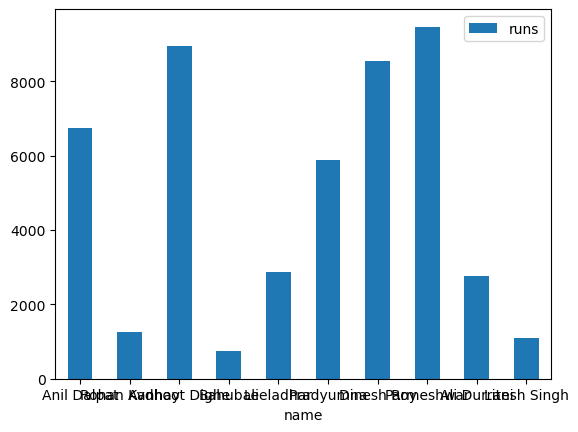

In [83]:
ax = df.plot.bar(x='name', y='runs', rot=0)

## 11. Sort and print information about players by ascending order of runs

In [85]:
df.sort_values(by=['runs'])


,sr.no,name,matches,runs,catches,wickets,stumpings,avg
3,4,Bahubali,10,756,6,11,3,68.727273
9,10,Litesh Singh,89,1099,46,49,0,22.428571
1,2,Rohan Kanhay,144,1256,76,178,0,7.056180
8,9,Ali Durrani,55,2756,12,26,0,106.000000
4,5,Leeladhar,234,2866,105,376,0,7.622340
5,6,Pradyumna,177,5877,47,122,0,48.172131
0,1,Anil Dalpat,122,6755,56,12,0,562.916667
6,7,Dinesh Roy,211,8537,112,16,0,533.562500
2,3,Avdhoot Dighe,265,8954,120,0,0,inf
7,8,Parmeshwar,245,9466,53,0,0,inf


## 12. print the names of players whose wickets are greater than matches

In [87]:
filter1=df['wickets']> df['matches']
df[filter1]

,sr.no,name,matches,runs,catches,wickets,stumpings,avg
1,2,Rohan Kanhay,144,1256,76,178,0,7.056180
3,4,Bahubali,10,756,6,11,3,68.727273
4,5,Leeladhar,234,2866,105,376,0,7.622340


In [88]:
df[filter1].name

1    Rohan Kanhay
3        Bahubali
4       Leeladhar
Name: name, dtype: object